# Time Series Data Analysis Project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# read the data
df = pd.read_csv('../00_datasets/flights.csv')
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [3]:
# add a date column by using year and month columns
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'])

print(df)

     year      month  passengers       date
0    1949    January         112 1949-01-01
1    1949   February         118 1949-02-01
2    1949      March         132 1949-03-01
3    1949      April         129 1949-04-01
4    1949        May         121 1949-05-01
..    ...        ...         ...        ...
139  1960     August         606 1960-08-01
140  1960  September         508 1960-09-01
141  1960    October         461 1960-10-01
142  1960   November         390 1960-11-01
143  1960   December         432 1960-12-01

[144 rows x 4 columns]


/tmp/ipykernel_326014/3747858619.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'])


# Data Pre-processing

In [4]:
# As data is already sorted, so no need to sort it

# Change name of columns
df.rename(columns={'passengers': 'Number of Passengers', 'date': 'Date'}, inplace=True)
df

,year,month,Number of Passengers,Date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,August,606,1960-08-01
140,1960,September,508,1960-09-01
141,1960,October,461,1960-10-01
142,1960,November,390,1960-11-01


In [5]:
import plotly.express as px

fig = px.line(df, x='Date', y='Number of Passengers', 
        title='Number of Passengers Over Time', 
        markers=True
        )
fig.update_traces(line_color='orange', marker=dict(color='red'))
fig.show()

In [6]:
df.shape

(144, 4)

In [7]:
# add a random values to the dataset for fare column
np.random.seed(42)
df['fare'] = np.random.randint(100, 500, size=len(df))
df


,year,month,Number of Passengers,Date,fare
0,1949,January,112,1949-01-01,202
1,1949,February,118,1949-02-01,448
2,1949,March,132,1949-03-01,370
3,1949,April,129,1949-04-01,206
4,1949,May,121,1949-05-01,171
...,...,...,...,...,...
139,1960,August,606,1960-08-01,104
140,1960,September,508,1960-09-01,317
141,1960,October,461,1960-10-01,354
142,1960,November,390,1960-11-01,497


In [8]:
# add a two sided plot with 1 y-axis for passengers and 2nd y-axis for fare
fig = px.line(df, x='Date', y='Number of Passengers', 
    title='Number of Passengers and Fare Over Time', 
    markers=True
    )
fig.add_scatter(x=df['Date'], y=df['fare'], mode='lines+markers', 
         name='Fare', yaxis='y2', line=dict(color='orange', dash='dash')  # Added dashed line here
         )
fig.update_layout(
    yaxis=dict(title='Number of Passengers', side='left'),
    yaxis2=dict(title='Fare', side='right', overlaying='y', 
    tickfont=dict(color='blue'), title_font=dict(color='blue')),
    title_x=0.5
)
fig.show()

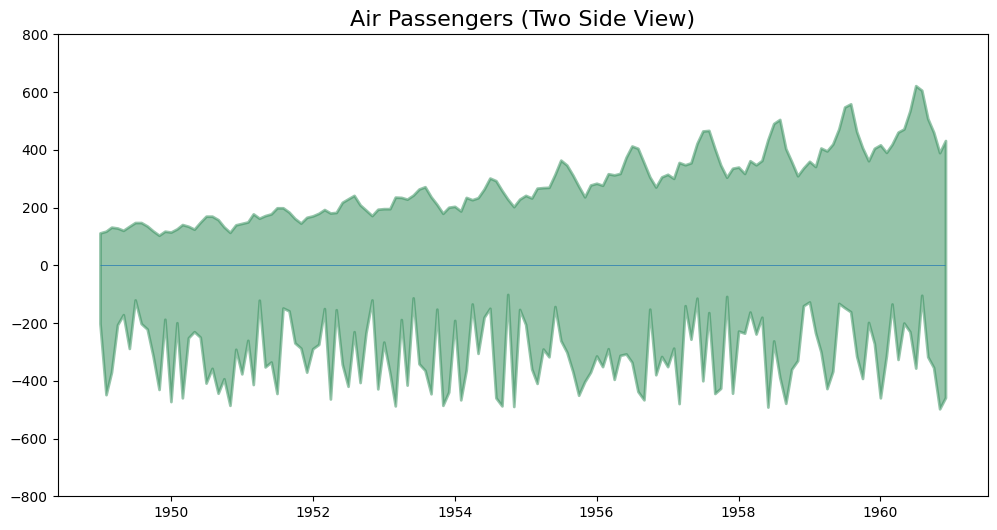

In [10]:
x = df['Date'].values
y1 = df['Number of Passengers'].values
y2 = df['fare'].values

# Plot -- two-sided area chart (sometimes called a mirror plot or butterfly plot)
plt.figure(figsize=(12, 6))
plt.fill_between(x, y1=y1, y2=-y2, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

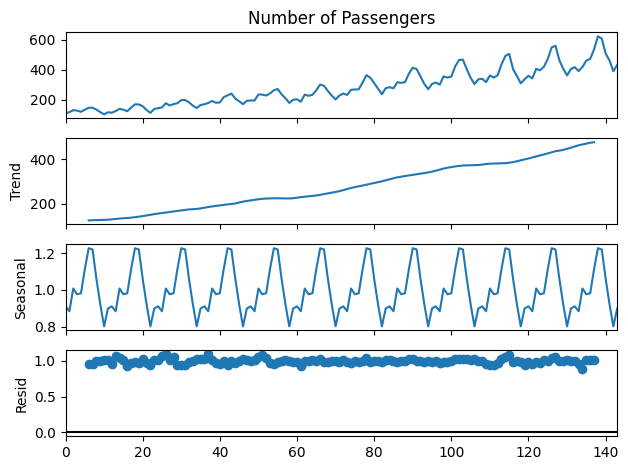

In [11]:
# decompose the data
result = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
result.plot()

# plot in plotly
fig = px.line(result.observed, x=result.observed.index, y=result.observed.values, title='Observed')
# fig = px.line(result.observed, x=df['Date'], y=result.observed.values, title='Observed')
fig.show()